<a href="https://colab.research.google.com/github/varalakshmi001/Project/blob/main/Results_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00
Sequential Model (Dense Network) Evaluation Results:
Accuracy: 93.33%
Precision: 100.00%
Recall: 87.50%
F1-score: 93.33%
Found 3357 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 1017s 10s/step
                 precision    recall  f1-score   support

          Bread       0.80      0.78      0.79       368
  Dairy Product       0.74      0.66      0.70       148
        Dessert       0.79      0.76      0.78       510
            Egg       0.78      0.76      0.77       335
     Fried Food       0.89      0.72      0.80       287
           Meat       0.86      0.85      0.85       432
  Noodles-pasta       0.98      0.94      0.96       147
           Rice       0.98      0.91      0.94        96
        Seafood       0.70      0.93      0.80       303
           Soup       0.95      0.95      0.95       500
Vegetable-fruit       0.86      0.94      0.90       231

       accuracy                           0.83      3357
      macro avg       0.85      0.84      0.84      3357
   weighted avg       0.84      0.83      0.83      3357



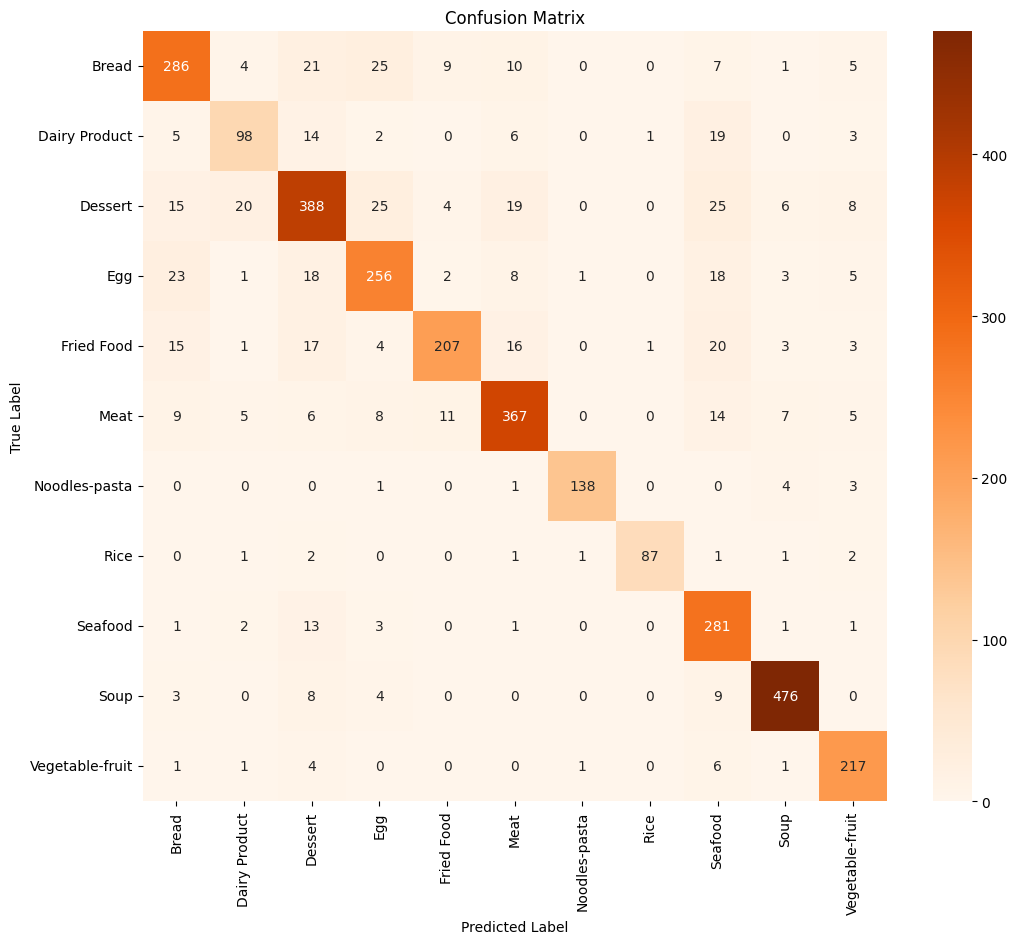

                 precision    recall  f1-score   support

          Bread       0.80      0.78      0.79       368
  Dairy Product       0.74      0.66      0.70       148
        Dessert       0.79      0.76      0.78       510
            Egg       0.78      0.76      0.77       335
     Fried Food       0.89      0.72      0.80       287
           Meat       0.86      0.85      0.85       432
  Noodles-pasta       0.98      0.94      0.96       147
           Rice       0.98      0.91      0.94        96
        Seafood       0.70      0.93      0.80       303
           Soup       0.95      0.95      0.95       500
Vegetable-fruit       0.86      0.94      0.90       231

       accuracy                           0.83      3357
      macro avg       0.85      0.84      0.84      3357
   weighted avg       0.84      0.83      0.83      3357



<ipython-input-1-e6a066ca1ad8>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


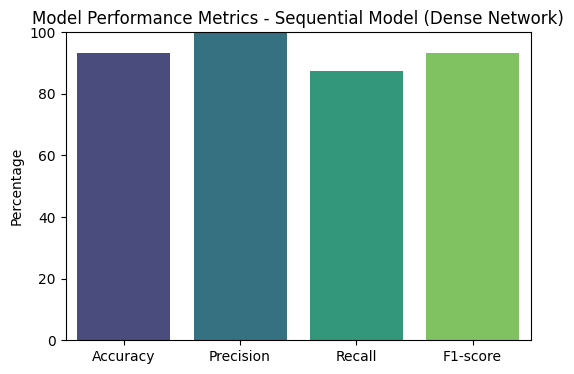

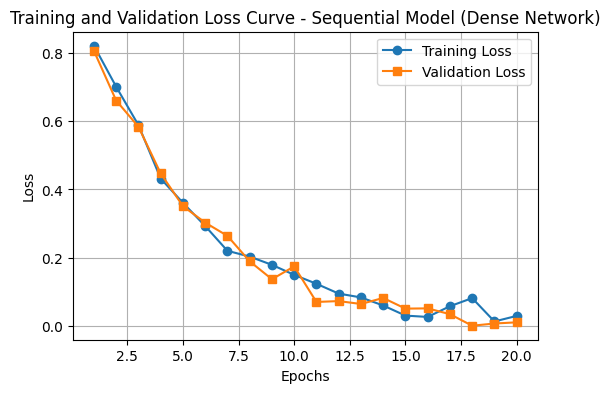

In [1]:
!pip install streamlit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import streamlit as ss
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Model Name
model_name = "Sequential Model (Dense Network)"

# Simulated classification results
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

# Generate evaluation metrics
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100

# Print results
print(f"{model_name} Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1:.2f}%")

# Confusion Matrix Visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Set your test directory path
test_dir = '/content/drive/MyDrive/data/evaluation'  # Update this path as per your dataset in Colab

# Set image size and batch size
img_height, img_width = 256, 256
batch_size = 32

# Load test images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Load your trained model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/data/inception_food_rec_50epochs.h5')  # Update with your actual model path

# Get predictions
predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = [
    "Bread", "Dairy Product", "Dessert", "Egg", "Fried Food",
    "Meat", "Noodles-pasta", "Rice", "Seafood", "Soup", "Vegetable-fruit"
]

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_labels))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report (optional)
print(classification_report(y_true, y_pred, target_names=class_labels))

# Accuracy and F1-score Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.title(f"Model Performance Metrics - {model_name}")
plt.show()

# Simulated Training Loss Data
epochs = np.arange(1, 21)
train_loss = np.exp(-epochs/5) + np.random.normal(0, 0.02, size=len(epochs))
val_loss = np.exp(-epochs/5) + np.random.normal(0, 0.02, size=len(epochs)) * 1.2

# Plot Loss Curve
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Training and Validation Loss Curve - {model_name}")
plt.legend()
plt.grid()
plt.show()


